### Análisis de componentes
### Introducción a Python
### GitHub repository: https://github.com/jorgemauricio/analisis_componentes
### Instructor: Jorge Mauricio

In [1]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

%matplotlib inline

In [3]:
# leer csv
df = pd.read_csv("data/PINA_ANTIOXIDANTE_2.csv")

In [4]:
# estructura del csv
df.head()

,MUESTRA,ABTS,DPPH,FENOLICOS
0,PiSAC50,3.406234,36.364233,5.294358
1,PiSAC50,3.614508,36.302729,6.370383
2,PiSAC50,3.537750,36.512914,6.284345
3,PiSAC50,3.441750,36.361602,5.192439
4,PiSAC50,3.614508,36.329017,5.732982


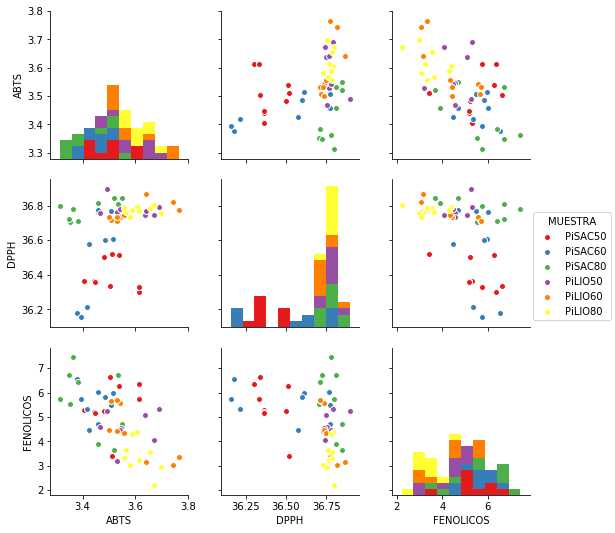

In [5]:
# EDA (Exploratory Data Analysis) correlación entre variables
sns.pairplot(df,hue='MUESTRA',palette='Set1')

In [6]:
# dividir los datos en entrenamiento y prueba para evitar que el modelo se sobrealimente
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('MUESTRA',axis=1)
y = df['MUESTRA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [7]:
# UTILIZAMOS UN ARBOL DE DECISIONES PARA DETERMINAR COMO ES QUE SE CLASIFICAN LOS COMPUESTOS DE ACUERDO
# A SUS CUALIDADES
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
# prediction and evaluation
predictions = dtree.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    PiLIO50       0.00      0.00      0.00         1
    PiLIO60       0.00      0.00      0.00         1
    PiLIO80       0.75      0.75      0.75         4
    PiSAC50       1.00      1.00      1.00         5
    PiSAC60       1.00      0.25      0.40         4
    PiSAC80       1.00      1.00      1.00         2

avg / total       0.82      0.65      0.68        17



In [10]:
print(confusion_matrix(y_test,predictions))

[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [1 0 3 0 0 0]
 [0 0 0 5 0 0]
 [3 0 0 0 1 0]
 [0 0 0 0 0 2]]


In [11]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['ABTS', 'DPPH', 'FENOLICOS']

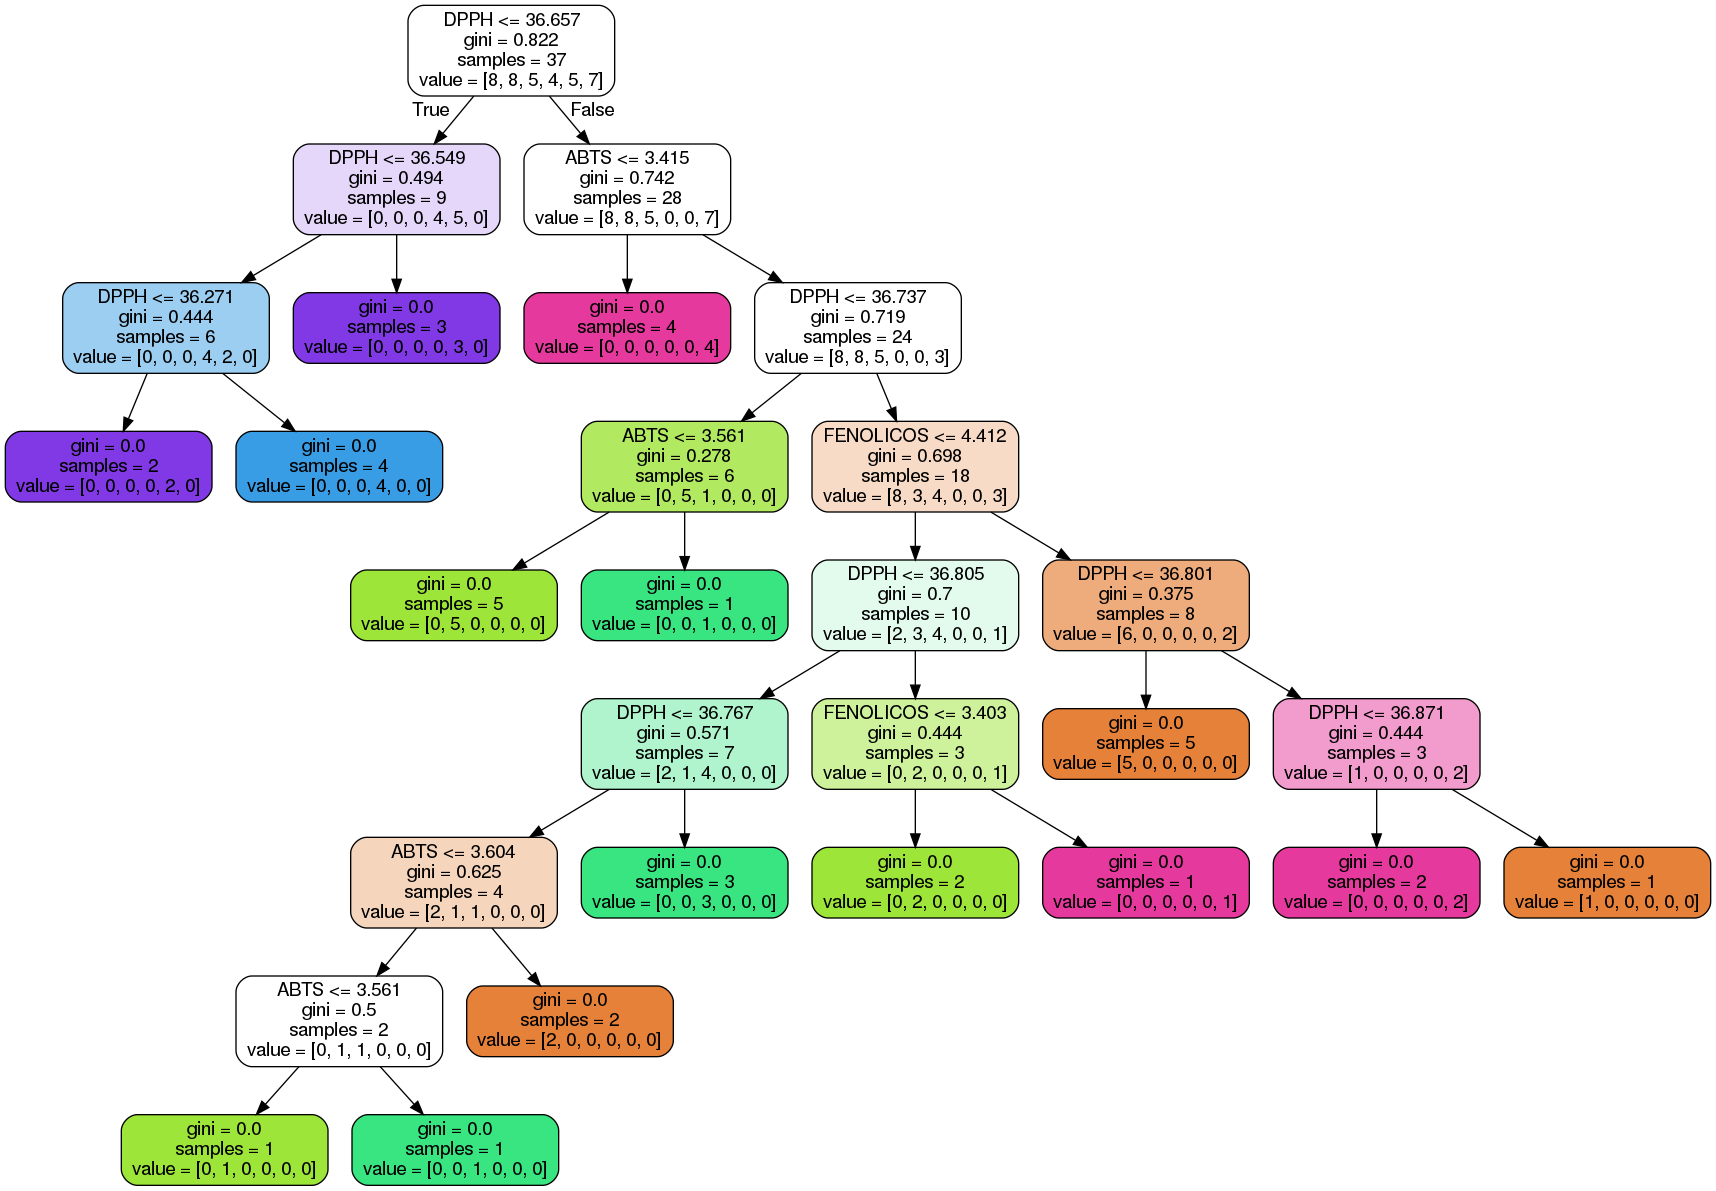

In [12]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [13]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [14]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [1 1 2 0 0 0]
 [0 0 0 2 3 0]
 [3 0 0 0 1 0]
 [0 0 0 0 0 2]]


In [15]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    PiLIO50       0.00      0.00      0.00         1
    PiLIO60       0.00      0.00      0.00         1
    PiLIO80       0.67      0.50      0.57         4
    PiSAC50       1.00      0.40      0.57         5
    PiSAC60       0.25      0.25      0.25         4
    PiSAC80       1.00      1.00      1.00         2

avg / total       0.63      0.41      0.48        17



In [16]:
# PCA
from sklearn.preprocessing import StandardScaler

In [17]:
X = df.drop("MUESTRA", axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_data = scaler.transform(X)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
x_pca = pca.transform(scaled_data)

In [23]:
scaled_data.shape

(54, 3)

In [24]:
x_pca.shape

(54, 2)

In [25]:
X.head()

,ABTS,DPPH,FENOLICOS
0,3.406234,36.364233,5.294358
1,3.614508,36.302729,6.370383
2,3.537750,36.512914,6.284345
3,3.441750,36.361602,5.192439
4,3.614508,36.329017,5.732982


In [26]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [27]:
y_dummies = list(map(generar_indice,y))

Text(0,0.5,'Second Principal Component')

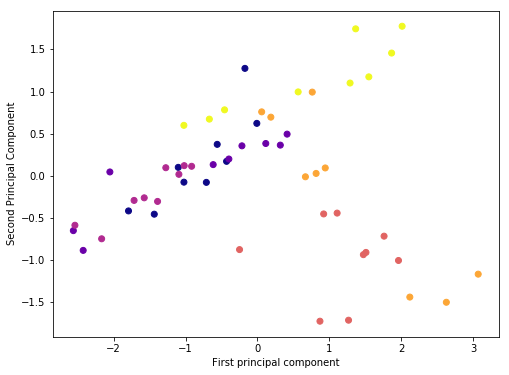

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_dummies,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [29]:
# interpreting the components
pca.components_

array([[-0.59717088, -0.50619782,  0.62221435],
       [-0.46416784,  0.85072312,  0.24661384]])

In [30]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

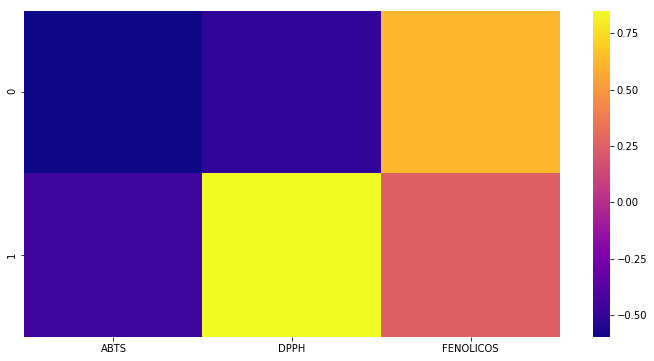

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [32]:
# K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y_dummies,
                                                    test_size=0.30)

In [33]:
# using KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [35]:
pred = knn.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(confusion_matrix(y_test,pred))

[[2 0 0 0 1 0]
 [1 2 0 0 0 0]
 [1 2 1 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [1 0 0 0 0 1]]


In [38]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.40      0.67      0.50         3
          2       0.50      0.67      0.57         3
          3       1.00      0.25      0.40         4
          4       1.00      1.00      1.00         3
          5       0.67      1.00      0.80         2
          6       1.00      0.50      0.67         2

avg / total       0.77      0.65      0.63        17



In [39]:
# choosing a K Value
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

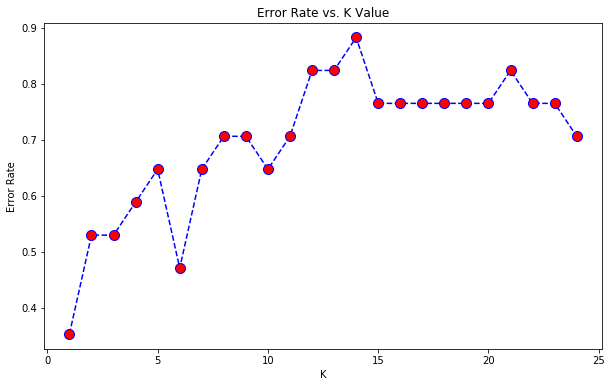

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[2 0 0 0 1 0]
 [1 2 0 0 0 0]
 [1 2 1 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [1 0 0 0 0 1]]


             precision    recall  f1-score   support

          1       0.40      0.67      0.50         3
          2       0.50      0.67      0.57         3
          3       1.00      0.25      0.40         4
          4       1.00      1.00      1.00         3
          5       0.67      1.00      0.80         2
          6       1.00      0.50      0.67         2

avg / total       0.77      0.65      0.63        17



In [42]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[1 1 0 0 1 0]
 [2 0 0 0 1 0]
 [4 0 0 0 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 2 0]
 [1 0 0 0 0 1]]


             precision    recall  f1-score   support

          1       0.12      0.33      0.18         3
          2       0.00      0.00      0.00         3
          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00         3
          5       0.29      1.00      0.44         2
          6       1.00      0.50      0.67         2

avg / total       0.17      0.24      0.16        17



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# EDA

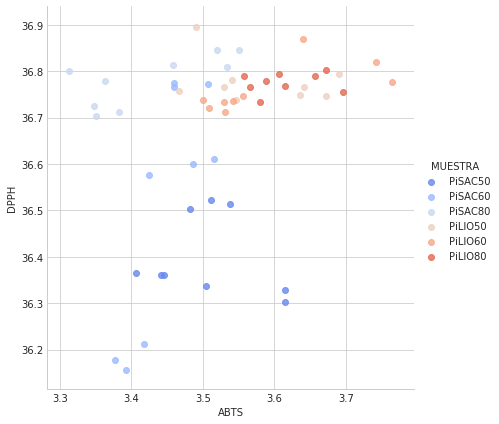

In [45]:
sns.set_style('whitegrid')
sns.lmplot('ABTS','DPPH',data=df, hue='MUESTRA',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(n_clusters=6)

In [48]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [49]:
kmeans.cluster_centers_

array([[ 3.63205873, 36.76047679,  3.09628341],
       [ 3.45753424, 36.54445979,  6.64354277],
       [ 3.50158558, 36.52989758,  5.23584009],
       [ 3.47464063, 36.62763268,  5.72583959],
       [ 3.57457599, 36.79220717,  3.76636478],
       [ 3.52459035, 36.75109956,  4.48904083]])

In [50]:
kmeans.labels_

array([2, 1, 1, 2, 3, 0, 2, 1, 2, 3, 1, 3, 3, 2, 3, 5, 3, 5, 5, 1, 1, 4,
       3, 3, 4, 1, 1, 2, 5, 2, 0, 5, 2, 4, 0, 5, 0, 3, 3, 0, 3, 5, 0, 5,
       5, 5, 4, 5, 0, 0, 0, 4, 0, 0], dtype=int32)

In [51]:
df.head()

,MUESTRA,ABTS,DPPH,FENOLICOS
0,PiSAC50,3.406234,36.364233,5.294358
1,PiSAC50,3.614508,36.302729,6.370383
2,PiSAC50,3.537750,36.512914,6.284345
3,PiSAC50,3.441750,36.361602,5.192439
4,PiSAC50,3.614508,36.329017,5.732982


In [52]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [53]:
df['Cluster'] = df['MUESTRA'].apply(generar_indice)
df.head(10)

,MUESTRA,ABTS,DPPH,FENOLICOS,Cluster
0,PiSAC50,3.406234,36.364233,5.294358,4
1,PiSAC50,3.614508,36.302729,6.370383,4
2,PiSAC50,3.537750,36.512914,6.284345,4
3,PiSAC50,3.441750,36.361602,5.192439,4
4,PiSAC50,3.614508,36.329017,5.732982,4
5,PiSAC50,3.512019,36.521491,3.395834,4
6,PiSAC50,3.445697,36.360945,5.163751,4
7,PiSAC50,3.504101,36.336903,6.650259,4
8,PiSAC50,3.482328,36.502357,5.237642,4
9,PiSAC60,3.516025,36.610170,5.974286,5


In [54]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[0 0 0 0 0 0 0]
 [2 0 3 0 1 3 0]
 [3 0 0 3 0 3 0]
 [5 0 0 0 2 2 0]
 [1 3 4 1 0 0 0]
 [0 1 1 5 0 2 0]
 [0 4 0 2 2 1 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         9
          2       0.00      0.00      0.00         9
          3       0.00      0.00      0.00         9
          4       0.00      0.00      0.00         9
          5       0.18      0.22      0.20         9
          6       0.00      0.00      0.00         9

avg / total       0.03      0.04      0.03        54



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
